In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import pathlib

In [4]:
train_dir = pathlib.Path('./Bird_Dataset/train')
val_dir = pathlib.Path('./Bird_Dataset/valid')
test_dir = pathlib.Path('./Bird_Dataset/test')

train_image_count = len(list(train_dir.glob('*/*.jpg')))
print(train_image_count)

47332


In [5]:
batch_size = 32
image_width = 224
image_height = 224

#creates a complete dataset from directory structure ready to use
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size = batch_size,
    image_size = (image_width, image_height)
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    batch_size = batch_size,
    image_size = (image_width, image_height)
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size = batch_size,
    image_size = (image_width, image_height)
)

Found 47332 files belonging to 325 classes.
Found 1625 files belonging to 325 classes.
Found 1625 files belonging to 325 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK', 'BO

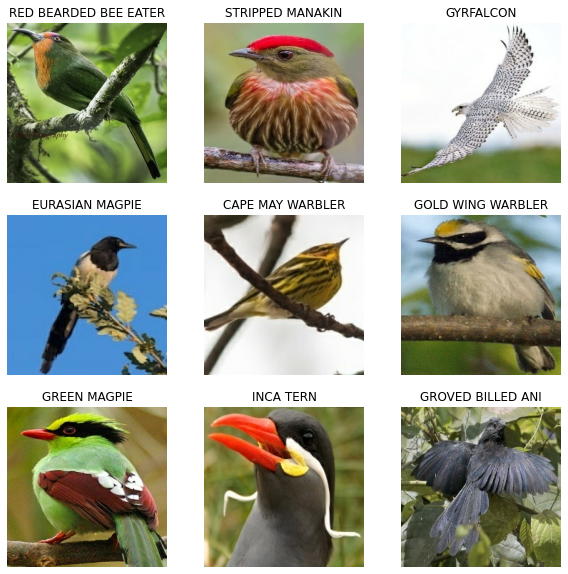

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')